O PySentimiento é uma das bibliotecas mais interessantes atualmente para análise de sentimentos e emoções com suporte a vários idiomas, incluindo português.

Ele foi criado sobre modelos BERT e RoBERTa já pré-treinados e afinados (fine-tuned) para tarefas de NLP social, como:
✅ Análise de sentimentos
✅ Análise de emoções
✅ Detecção de ódio
✅ Detecção de ironia

| Recurso                | Descrição                              |
| ---------------------- | -------------------------------------- |
| **Idiomas suportados** | en, es, it, pt, fr, ca, eu, gl         |
| **Tarefas**            | Sentiment, Emotion, Hate Speech, Irony |
| **Base**               | Modelos BERT/RoBERTa fine-tuned        |
| **Instalação**         | `pip install pysentimiento`            |


In [7]:
import pandas as pd

import emoji
from pysentimiento import create_analyzer

import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import plotly.graph_objects as go

c:\Users\Computador\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [14]:
comentarios = pd.read_csv("comentarios.csv")
comentarios = comentarios[["date", "app_version", "score", "system", "app", "content"]]
comentarios.head()

,date,app_version,score,system,app,content
0,2025-05-27 18:54:37,18.7.0,5,Android,Claro,legal 😎
1,2025-05-27 18:10:04,18.6.0,5,Android,Claro,Encontro facilidade por aqui 👏
2,2025-05-27 17:49:18,18.7.0,5,Android,Claro,muito bom
3,2025-05-27 17:46:20,NaN,1,Android,Claro,ruim que vc deseja não tem informações
4,2025-05-27 17:20:22,18.7.0,5,Android,Claro,melhor do mundo


In [16]:
#Tenho 50k de comentários por app, mas vou usar apenas 5k
comentarios_claro = comentarios[comentarios["app"] == "Claro"][:5000]
comentarios_tim = comentarios[comentarios["app"] == "TIM"][:5000]
comentarios_vivo = comentarios[comentarios["app"] == "Vivo"][:5000]

**Processamento dos Emojis**

In [17]:
def remover_emojis(texto):
    return emoji.demojize(texto, language='pt')

comentarios_claro["comentario_sem_emoji"] = comentarios_claro["content"].apply(remover_emojis)
comentarios_tim["comentario_sem_emoji"] = comentarios_tim["content"].apply(remover_emojis)
comentarios_vivo["comentario_sem_emoji"] = comentarios_vivo["content"].apply(remover_emojis)


|Tipo de Análise | Informativo |
|----------------|-------------|
| emotion        | aaaa        |
| irony          | aaaa        |
| hate_speech    | aaaa        |
| sentiment      | aaaa        |

# Análise de Sentimento

**pysentimiento**
- Biblioteca que oferece modelos baseados em BERT, fine-tunados para emoções e sentimento em português.
- Usa modelos robustos, prontos para uso.

✅ Pontos positivos:
Muito mais preciso.

Entende contexto, ironia, gírias e até alguns emojis.

Modelos modernos.

❌ Pontos negativos:
Mais pesado.

Pode exigir mais tempo de execução.

Não personalizável facilmente.

## Funções

In [56]:
#Função para realizar todas as análises
analyzers = {
    "irony": create_analyzer(task="irony", lang="pt"),
    "hate_speech": create_analyzer(task="hate_speech", lang="pt"),
    "sentiment": create_analyzer(task="sentiment", lang="pt"),
    "emotion": create_analyzer(task="emotion", lang="pt")
}

def analisar_sentimento_todos(texto, analyzers=analyzers):

    if not isinstance(texto, str) or not texto.strip():
        return pd.Series()

    dados = {}

    for tipo, analyzer in analyzers.items():
        resultado = analyzer.predict(texto)

        # Ajuste seguro do output
        if isinstance(resultado.output, list):
            saida = resultado.output[0] if resultado.output else None
        else:
            saida = resultado.output

        dados[f"{tipo}_output"] = saida

        for k, v in resultado.probas.items():
            dados[f"{tipo}_{k}"] = v

    return pd.Series(dados)


In [73]:
#TESTE
# Criando os analyzers
analyzers = {
    "irony": create_analyzer(task="irony", lang="pt"),
    "hate_speech": create_analyzer(task="hate_speech", lang="pt"),
    "sentiment": create_analyzer(task="sentiment", lang="pt"),
    "emotion": create_analyzer(task="emotion", lang="pt")
}

# Grupos para emoções resumidas
grupos_emocoes = {
    "alegria": ["admiration", "amusement", "approval", "excitement",
        "gratitude", "joy", "love", "optimism", "pride"],
    "tristeza": ["disappointment", "remorse", "sadness"],
    "raiva": ["anger", "annoyance", "disapproval", "disgust"],
    "medo": ["fear", "nervousness", "embarrassment"],
    "surpresa": ["surprise", "realization"],
    "confianca_interesse": ["curiosity", "desire", "caring"],
    "confusao": ["confusion"],
    "neutro": ["neutral", None]
}



def analisar_sentimento_todos(texto, analyzers=analyzers):

    if not isinstance(texto, str) or not texto.strip():
        return pd.Series()

    dados = {}

    for tipo, analyzer in analyzers.items():
        resultado = analyzer.predict(texto)

        # Ajuste seguro do output
        if isinstance(resultado.output, list):
            saida = resultado.output[0] if resultado.output else None
        else:
            saida = resultado.output

        dados[f"{tipo}_output"] = saida

        if tipo == "emotion":
            # Pós-processamento: agregando emoções
            for grupo, emocoes in grupos_emocoes.items():
                soma = sum(resultado.probas.get(e, 0) for e in emocoes)
                dados[f"{tipo}_{grupo}"] = soma
        else:
            # Para outras tasks, mantém probas originais
            for k, v in resultado.probas.items():
                dados[f"{tipo}_{k}"] = v

    return pd.Series(dados)


In [ ]:
analyzers = {
    "irony": create_analyzer(task="irony", lang="pt"),
    "hate_speech": create_analyzer(task="hate_speech", lang="pt"),
    "sentiment": create_analyzer(task="sentiment", lang="pt"),
    "emotion": create_analyzer(task="emotion", lang="pt")
}

# Grupos para emoções resumidas
grupos_emocoes = {
    "alegria": ["admiration", "amusement", "approval", "excitement",
                "gratitude", "joy", "love", "optimism", "pride"],
    "tristeza": ["disappointment", "remorse", "sadness"],
    "raiva": ["anger", "annoyance", "disapproval", "disgust"],
    "medo": ["fear", "nervousness", "embarrassment"],
    "surpresa": ["surprise", "realization"],
    "confianca": ["curiosity", "desire", "caring"],
    "confusao": ["confusion"],
    "neutro": ["neutral", None]
}

def analisar_sentimento_todos(texto, analyzers=analyzers):
    if not isinstance(texto, str) or not texto.strip():
        return pd.Series()

    dados = {}

    for tipo, analyzer in analyzers.items():
        resultado = analyzer.predict(texto)

        # Ajuste seguro do output
        if isinstance(resultado.output, list):
            saida = resultado.output[0] if resultado.output else None
        else:
            saida = resultado.output

        # Para emoção, substituir output pela categoria agregada
        if tipo == "emotion":
            # Pós-processamento: agregando emoções
            grupo_probs = {}
            for grupo, emocoes in grupos_emocoes.items():
                soma = sum(resultado.probas.get(e, 0) for e in emocoes)
                dados[f"{tipo}_{grupo}"] = soma
                grupo_probs[grupo] = soma
            
            # Encontrar o grupo com maior probabilidade
            if grupo_probs:
                grupo_principal = max(grupo_probs, key=grupo_probs.get)
            else:
                grupo_principal = None

            dados[f"{tipo}_output"] = grupo_principal
        else:
            # Mantém output original
            dados[f"{tipo}_output"] = saida
            # Mantém probas originais
            for k, v in resultado.probas.items():
                dados[f"{tipo}_{k}"] = v

    return pd.Series(dados)


In [7]:
#Função para realizar apenas uma análise
def analisar_sentimento(texto):
    resultado = analyzer.predict(texto)

    if resultado.output:
        saida = resultado.output[0]
    else:
        saida = None

    dados = {'output':  saida}

    for emocao, prob in resultado.probas.items():
        dados[emocao] = prob

    return pd.Series(dados)

## Análises

In [8]:
resultados = comentarios_claro["comentario_sem_emoji"].apply(analisar_sentimento_todos)
df_claro = pd.concat([comentarios_claro, resultados], axis=1)

NameError: name 'comentarios_claro' is not defined

In [ ]:
resultados = comentarios_tim["comentario_sem_emoji"].apply(analisar_sentimento_todos)
df_tim = pd.concat([comentarios_tim, resultados], axis=1)

In [ ]:
resultados = comentarios_vivo["comentario_sem_emoji"].apply(analisar_sentimento_todos)
df_vivo = pd.concat([comentarios_vivo, resultados], axis=1)

In [9]:
df_claro = pd.read_csv("df_claro2.csv")
df_tim = pd.read_csv("df_tim2.csv")
df_vivo = pd.read_csv("df_vivo2.csv")

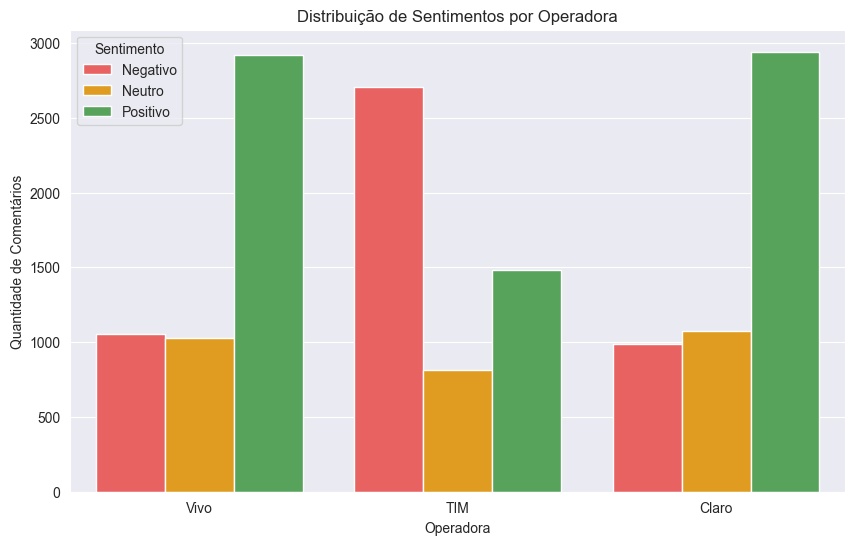

In [ ]:
# Mapear sentimentos para Negativo, Neutro e Positivo
def map_sentiment(sent):
    if sent in ['NEG', 'negativo']:
        return 'Negativo'
    elif sent in ['NEU', 'neutro']:
        return 'Neutro'
    elif sent in ['POS', 'positivo']:
        return 'Positivo'
    else:
        return 'Outro'

# Concatenar os DataFrames
df_geral = pd.concat([df_vivo, df_tim, df_claro], ignore_index=True)
df_geral['sentimento_simplificado'] = df_geral['sentiment_output'].apply(map_sentiment)

# Ajustar o estilo
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

# Plotar gráfico com hue simplificado
sns.countplot(
    data=df_geral,
    x='app',
    hue='sentimento_simplificado',
    palette={'Negativo': '#FF4C4C', 'Neutro': '#FFA500', 'Positivo': '#4CAF50'},
    hue_order=['Negativo', 'Neutro', 'Positivo']
)

plt.title("Distribuição de Sentimentos por Operadora", loc="center")
plt.xlabel("Operadora")
plt.ylabel("Quantidade de Comentários")
plt.legend(title="Sentimento")

plt.show()


In [56]:
values_claro = df_geral[df_geral['app'] == 'Claro'][['emotion_alegria', 'emotion_tristeza', 'emotion_raiva',
              'emotion_medo', 'emotion_surpresa', 'emotion_confianca_interesse',
              'emotion_confusao', 'emotion_neutro']].mean().tolist()

values_tim = df_geral[df_geral['app'] == 'TIM'][['emotion_alegria', 'emotion_tristeza', 'emotion_raiva',
              'emotion_medo', 'emotion_surpresa', 'emotion_confianca_interesse',
              'emotion_confusao', 'emotion_neutro']].mean().tolist()

values_vivo = df_geral[df_geral['app'] == 'Vivo'][['emotion_alegria', 'emotion_tristeza', 'emotion_raiva',
              'emotion_medo', 'emotion_surpresa', 'emotion_confianca_interesse',
              'emotion_confusao', 'emotion_neutro']].mean().tolist()


In [57]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

categories = ['Alegria', 'Tristeza', 'Raiva', 'Medo', 'Surpresa', 'Confiança', 'Confusão', 'Neutro']

# Valores de exemplo para cada operadora
values_vivo = values_vivo
values_tim = values_tim
values_claro = values_claro

# Criar subplots
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}]]
)

# Gráfico Vivo
fig.add_trace(go.Scatterpolar(
    r=values_vivo,  # Não fechando a linha
    theta=categories,
    fill='toself',
    name='Vivo',
    line=dict(color='royalblue'),
    opacity=0.7
), row=1, col=1)

# Gráfico TIM
fig.add_trace(go.Scatterpolar(
    r=values_tim,
    theta=categories,
    fill='toself',
    name='TIM',
    line=dict(color='firebrick'),
    opacity=0.7
), row=1, col=2)

# Gráfico Claro
fig.add_trace(go.Scatterpolar(
    r=values_claro,
    theta=categories,
    fill='toself',
    name='Claro',
    line=dict(color='darkgreen'),
    opacity=0.7
), row=1, col=3)

# Ajustar o layout geral
fig.update_layout(
    showlegend=False,
    title_text="Distribuição de Emoções por Operadora",
    height=650, width=1800,
)

fig.update_layout(
    polar=dict(radialaxis=dict(visible=False)),
    polar2=dict(radialaxis=dict(visible=False)),
    polar3=dict(radialaxis=dict(visible=False))
)


# Ajuste do posicionamento dos títulos: mais para cima
fig.add_annotation(dict(font=dict(size=16),
                        x=0.13,
                        y=1.1,
                        showarrow=False,
                        text="Vivo",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(size=16),
                        x=0.5,
                        y=1.1,
                        showarrow=False,
                        text="TIM",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(size=16),
                        x=0.87,
                        y=1.1,
                        showarrow=False,
                        text="Claro",
                        xref="paper",
                        yref="paper"))

fig.show()


# Classificação de Temas